# Bank Marketing DataSet - Intelligent Targeting:
***
## Marketing Introduction:
*The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return.*

***

**Marketing campaigns** are characterized by  focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. <br>

## The 4 Ps:
1) Segment of the <b>Population:</b> To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. <br><br>
2) Distribution channel to reach the customer's <b>place</b>: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)<br><br>
3) <b> Price:</b> What is the best price to offer to potential clients? (In the case of the bank's marketing campaign this is not necessary since the main interest for the bank is for potential clients to open depost accounts in order to make the operative activities of the bank to keep on running.)<br><br>
4) <b> Promotional</b> Strategy: This is the way the strategy  is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an indepth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

# What is a Term Deposit? 
A **Term deposit** is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia:  https://www.investopedia.com/terms/t/termdeposit.asp

# Outline Index: <br>
***
A. **Attribute Descriptions**<br>
I. *[Bank client data](#bank_client_data)<br>
II. *[Related with the last contact of the current campaign](#last_contact)<br>
III. [Other attributes](#other_attributes) <br>

B. **Structuring the data:** <br>
I. *[Overall Analysis of the Data](#overall_analysis)<br>
II. *[Data Structuring and Conversions](#data_structuring) <br>

C. **Exploratory Data Analysis (EDA)**<br>
I. *[Accepted vs Rejected Term Deposits](#accepted_rejected) <br>
II. *[Distribution Plots](#distribution_plots) <br>



E. **Correlations that impacted the decision of Potential Clients.** <br>
I. *[Analysis of our Correlation Matrix](#analysis_correlation) <br>
II. [Negative Relationship between H.Loans and Term Deposits](#negative_correlation) <br>

F. ** Classification Model **<br>
I. [Introduction](#classification_model)<br> 
II. [Stratified Sampling](#Stratified_sampling)<br>
III. [Classification Models](#Models)<br>
IV. [Confusion Matrix](#confusion)<br>
V. [Precision and Recall Curve](#precision_recall)<br>
VI. [Roc_auc_curve](#roc_auc) <br>
VII. [Parameter Optimization](#parameter_optimization)<br>

G. ** Next Campaign Strategy**<br>
I. [Actions the Bank should Consider](#bank_actions)<br>

# A. Attributes Description: <br>

Input variables:<br>
# Ai. bank client data:<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.
# Aii. Related with the last contact of the current campaign:
<a id="last_contact"></a>
8 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
# Aiii. other attributes:<br>
<a id="other_attributes"></a>
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


df = pd.read_csv('../input/bank.csv')
term_deposits = df.copy()
data1=df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
df.shape

(11162, 17)


<h3> Exploring the Basics </h3>
<a id="overall_analysis"></a>
## Summary:
***
<ul>
<li type="square"> <b>Mean Age</b> is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)</li><br>
<li type="square"> The <b>mean balance</b> is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.</li><br>
<li type="square">As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, <b>duration is obtained after the call is made to the potential client</b> so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit  is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client. </li><br>
</ul>

**Note: There are not that much insights we can gain from the descriptive dataset since most of our descriptive data is located not in the "numeric" columns but in the "categorical columns".**


<a id="data_structuring"></a>

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Fortunately, there are no <b>missing values</b>. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [4]:
# No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<a id = 'accepted_rejected'></a>

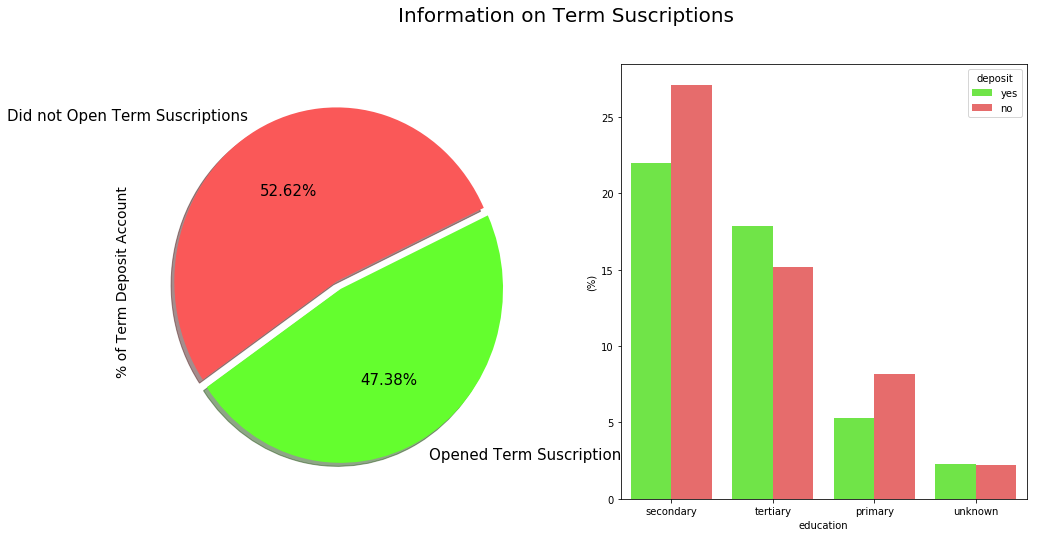

In [5]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=15, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Term Deposit Account', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

### Let's see how the numerical data is distributed.

<a id='distribution_plots'></a>

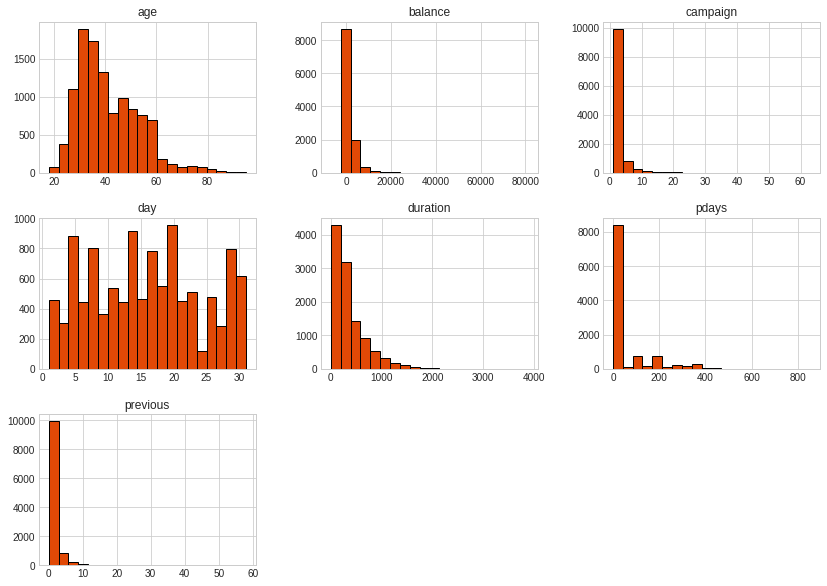

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906', edgecolor ='black')
plt.show()

## Count of Yes vs No in Deposit Columns

In [7]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

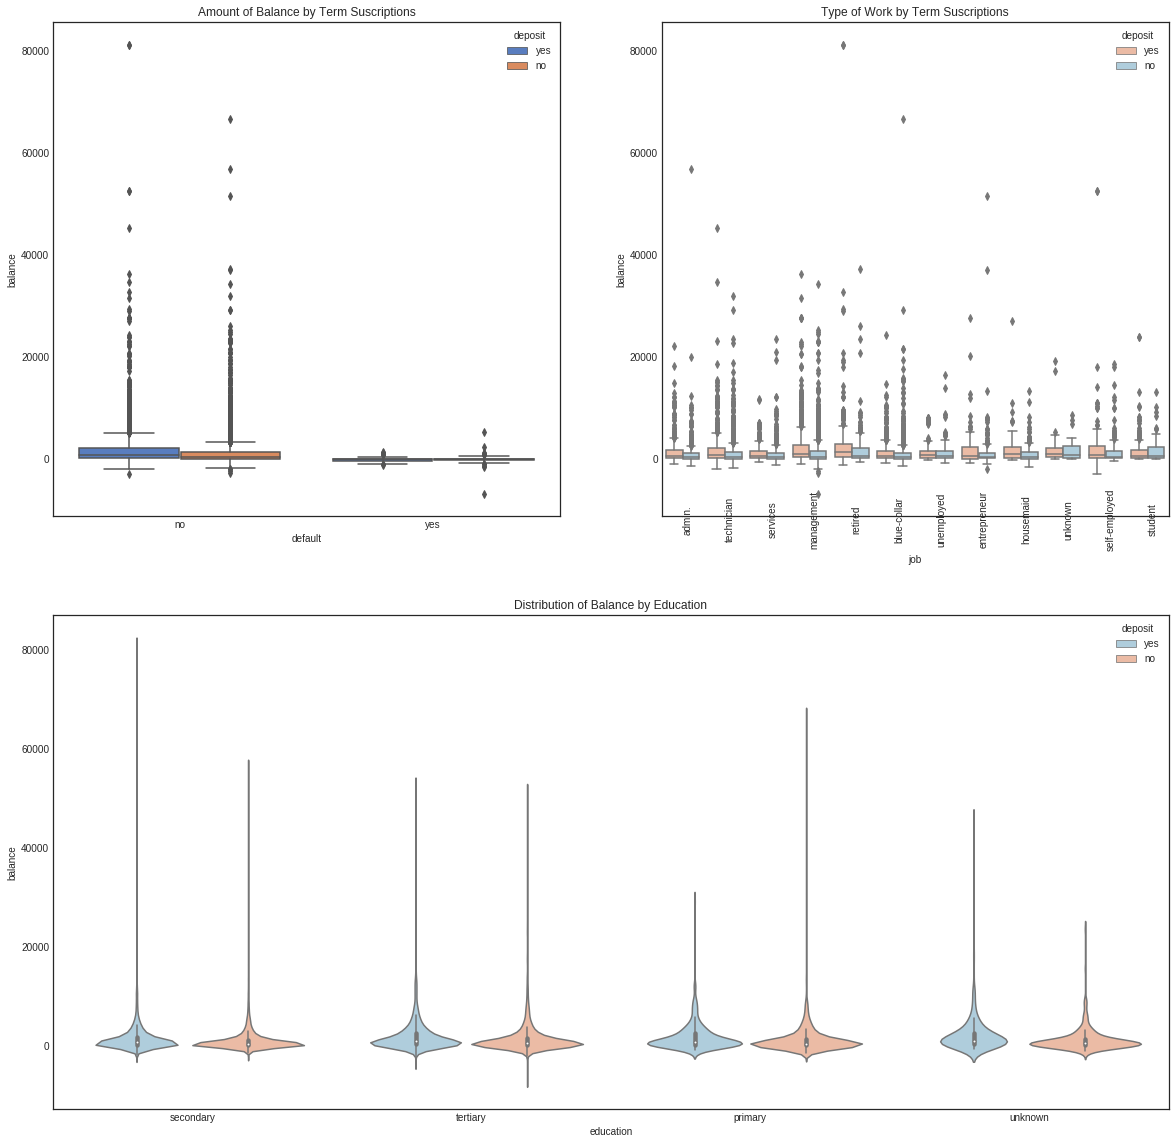

In [8]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


 # Analysis of data by Occupation

<h3> Analysis by Occupation criteria: </h3>
<ul> 
    <li> <b> Number of Occupations: </b>  Management is the occupation that is more prevalent in this dataset.</li>
    <li><b>Age by Occupation: </b>  As expected, the retired are the ones who have the highest median age while student are the lowest.</li>
    <li><b> Balance by Occupation: </b> Management and Retirees are the ones who have the highest balance in their accounts. </li>
    </ul>

In [10]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### First Distribution of Age of customers with respect to Occupation

In [12]:
suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

### Now let's see which occupation tended to have more balance in their accounts

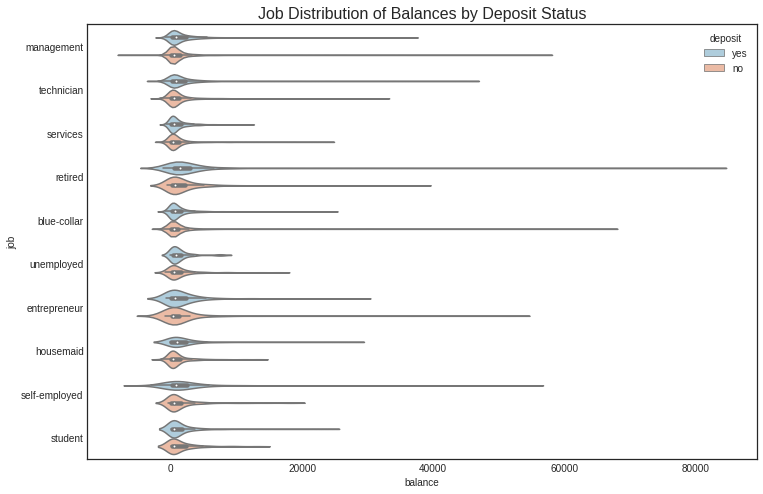

In [13]:
# Balance Distribution
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

In [14]:

# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Bar(
    x=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Bar(
    x=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Bar(
    x=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Bar(
    x=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)


data = [trace1, trace2, trace3, trace4]



### Let's Plot the Data
Select Area to zoom in using Mouse Cursor

In [15]:

layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

## Let's Analyze the data with respect to the Customer's Marital Status

In [16]:
df['marital'].value_counts()

married     6302
single      3499
divorced    1291
Name: marital, dtype: int64

In [17]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [18]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
     
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
     
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=True, title="Balance Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low


In [20]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [21]:
#Plotting Range of Income for marital Groups 

fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

<h3> Marital Status </h3>
Well in this analysis we found out that most <b> 
divorced individuals </b> are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low


<h3>Clustering Marital Status and Education: </h3>

<ul> 
    <li><b>Marital Status: </b>  As discussed previously, the impact of a divorce has a significant impact on the balance of the individual. </li>
    <li><b>Education: </b> The level of education also has a significant impact on the amount of balance a prospect has.</li>
    <li><b> Loans: </b> Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has. </li>
</ul>

In [23]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

### Let's Combine the Education Level with Marital Status and Analyze

In [24]:
df['marital/education']=df['marital']+'/'+df['education']   
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


In [25]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()
education_groups.head()

,marital/education,balance
0,divorced/primary,414.0
1,divorced/secondary,361.5
2,divorced/tertiary,578.5
3,married/primary,518.5
4,married/secondary,556.0


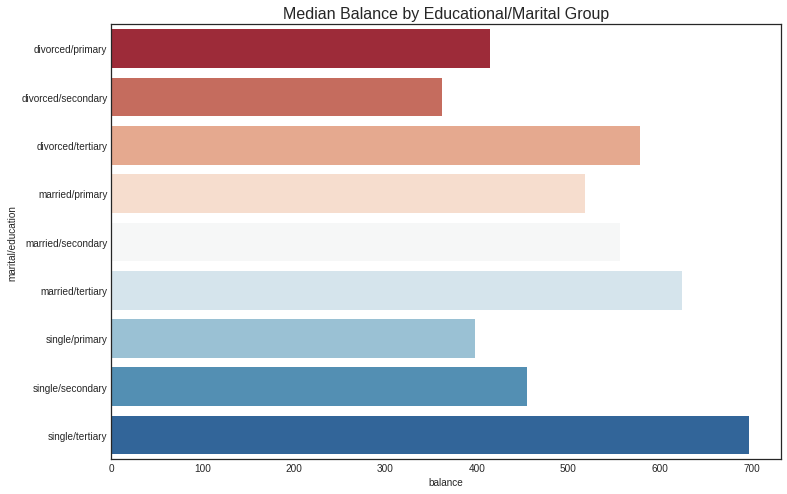

In [26]:
fig = plt.figure(figsize=(12,8))

sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)
plt.show()

### Let's see the group who had loans from the marital/education group

In [27]:
loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()

no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values

labels = loan_balance['marital/education'].unique().tolist()

trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]


In [28]:
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


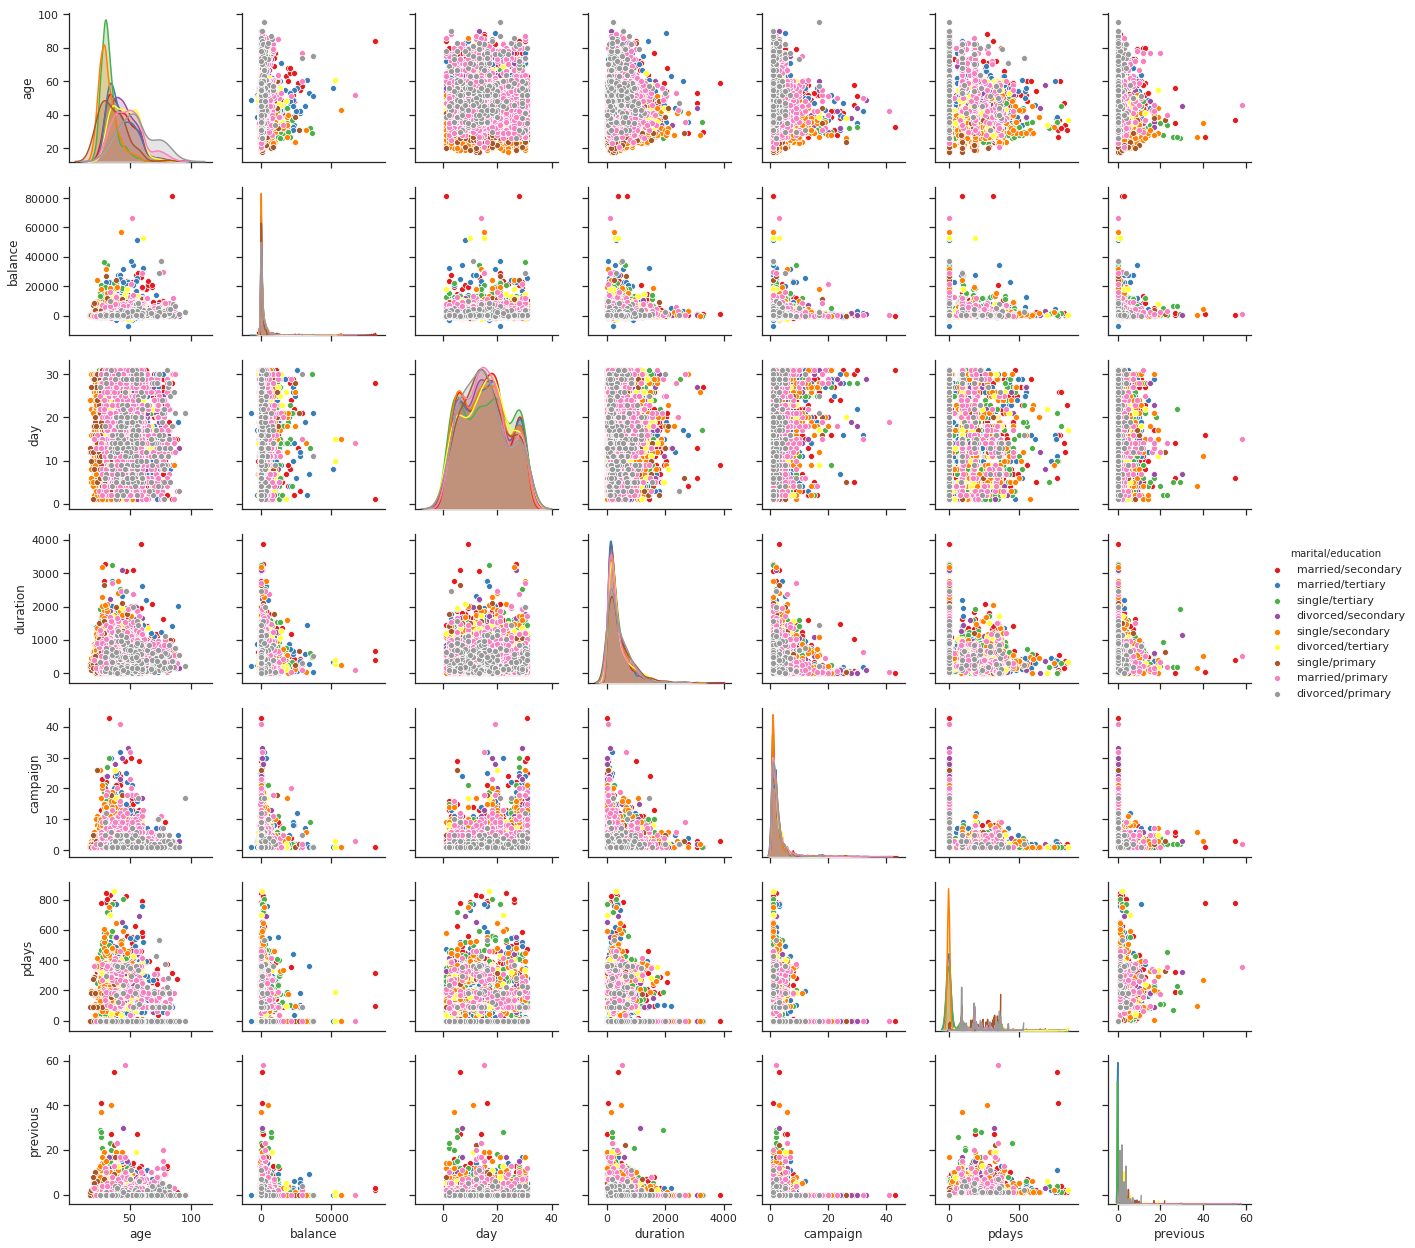

In [30]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


<a id="analysis_correlation"> </a>

## Correlation Matrix

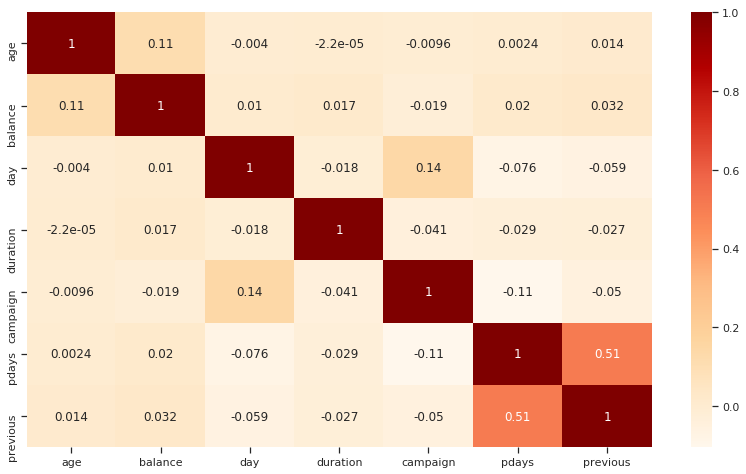

In [32]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True,cmap="OrRd")
plt.show()

<h2> <b>Classification Model:</b> </h2>

In [33]:
term_deposits=df.copy()
term_deposits.deposit.value_counts()

no     5613
yes    5021
Name: deposit, dtype: int64

In [34]:
term_deposits.deposit=term_deposits.deposit.map({'yes':1,'no':0})
term_deposits.housing=term_deposits.housing.map({'yes':1,'no':0})
term_deposits.deposit.value_counts()

0    5613
1    5021
Name: deposit, dtype: int64

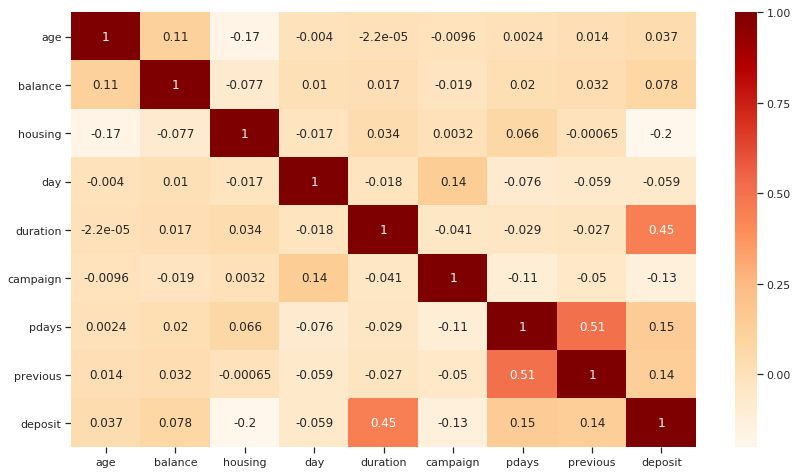

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(term_deposits.corr(), annot = True,cmap="OrRd")
plt.show()

<a id ='negative_correlation'></a>

In [36]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
term_deposits.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
term_deposits["housing"].value_counts()/len(term_deposits)

0    0.52003
1    0.47997
Name: housing, dtype: float64

## Dummy Variable Creation for Data with Categorical Values

In [37]:
df_new=pd.get_dummies(data1, drop_first=True)
df_new.head()
df_new.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')

In [38]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [39]:
df_new["loan_yes"].value_counts()/len(term_deposits)*100

0    91.235659
1    13.729547
Name: loan_yes, dtype: float64

<a id='Stratified_sampling'></a>

### In order to maintain the Same Ratio in our Train and Test set we will use stratified Sampling technique

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_set, test_set in stratified.split(df_new, df_new["loan_yes"]):
    stratified_train = df_new.loc[train_set]
    stratified_test = df_new.loc[test_set]
    
stratified_train["loan_yes"].value_counts()/len(stratified_train)

0    0.86919
1    0.13081
Name: loan_yes, dtype: float64

In [41]:

stratified_test["loan_yes"].value_counts()/len(stratified_test)

0    0.869234
1    0.130766
Name: loan_yes, dtype: float64

In [42]:

train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
print(train_data.shape)
print(test_data.shape)

(8929, 43)
(2233, 43)


In [43]:
train_data['deposit_yes'].value_counts()

0    4708
1    4221
Name: deposit_yes, dtype: int64

### Separate the labels(y) and the features(X)

In [44]:
X_train=train_data.drop(['deposit_yes'], axis=1)
y_train=train_data.deposit_yes
X_test=test_data.drop('deposit_yes', axis=1)
y_test=test_data.deposit_yes

## Scaling Numerical Features to a common scale
Since Numerical Coulumns are on Different Scales and may impact our Prediction

In [45]:
numerical_columns = ['age','balance','day','duration','campaign','pdays','previous']
train_data[numerical_columns].head()

,age,balance,day,duration,campaign,pdays,previous
8307,39,522,14,225,7,350,2
4068,77,820,21,330,2,181,4
10196,46,306,11,289,5,-1,0
7007,33,5083,27,161,1,96,2
4553,60,362,29,816,6,-1,0


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[numerical_columns]=scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns]=scaler.transform(test_data[numerical_columns])
train_data[numerical_columns].head()

,age,balance,day,duration,campaign,pdays,previous
8307,-0.190792,-0.316476,-0.193506,-0.420675,1.593106,2.728464,0.529519
4068,3.003995,-0.223638,0.636603,-0.116465,-0.187136,1.183481,1.433809
10196,0.397722,-0.383767,-0.549266,-0.235252,0.881009,-0.480347,-0.374770
7007,-0.695232,1.104436,1.348124,-0.606098,-0.543184,0.406418,0.529519
4553,1.574748,-0.366321,1.585298,1.291593,1.237058,-0.480347,-0.374770


### Let's Create A baseline model for Benchmarking
<a id='classification_model'></a>

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
baselog_model = LogisticRegression()
baselog_model.fit(X_train,y_train)
y_pred = baselog_model.predict(X_test)
print(accuracy_score(y_pred,y_test))


0.8240035826242723


<a id ='Models'></a>

### Using advanced Classification Algos for prediction and Comparing their Accuracy

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_of_algos={'LR':LogisticRegression(),'svc':SVC(),'KNC':KNeighborsClassifier(),'DT':tree.DecisionTreeClassifier(),'MLPc':MLPClassifier(),
               'GRBC':GradientBoostingClassifier(),'RFC':RandomForestClassifier(),'GNB':GaussianNB()}

In [49]:
def accuracy_of_algos(dict_of_algos):
    dict_of_accuracy={}
    for k,v in dict_of_algos.items():
        v.fit(X_train,y_train)
        y_pred = v.predict(X_test)
        dict_of_accuracy[k] = accuracy_score(y_pred,y_test)
        y=v.score(X_train,y_train)
    print(dict_of_accuracy)

print(accuracy_of_algos(dict_of_algos))  

{'LR': 0.8240035826242723, 'svc': 0.5132109270040305, 'KNC': 0.7456336766681594, 'DT': 0.7774294670846394, 'MLPc': 0.7093596059113301, 'GRBC': 0.8441558441558441, 'RFC': 0.8266905508284819, 'GNB': 0.729064039408867}
None


In [50]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [51]:

no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train,X_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score', 'training_time','test_score'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        
        y_pred=classifier.predict(X_test)
        test_score=accuracy_score(y_test,y_pred)
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        df_results.loc[count,'test_score']=test_score
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [52]:
df_results = batch_classify(X_train, y_train,X_test)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.15 s
trained Nearest Neighbors in 0.06 s
trained Linear SVM in 11.31 s
trained Gradient Boosting Classifier in 1.22 s
trained Decision Tree in 0.08 s
trained Random Forest in 0.19 s
trained Neural Net in 3.33 s
trained Naive Bayes in 0.05 s
                     classifier     ...      test_score
4                 Decision Tree     ...        0.790864
2                    Linear SVM     ...        0.513211
5                 Random Forest     ...        0.841021
3  Gradient Boosting Classifier     ...        0.843260
0           Logistic Regression     ...        0.824004
1             Nearest Neighbors     ...        0.745634
6                    Neural Net     ...        0.790864
7                   Naive Bayes     ...        0.729064

[8 rows x 4 columns]


### Avoiding Overfitting:
Brief Description of Overfitting<br>
This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awsome score in the training set but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term deposit or not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores. <br><br>


How can we avoid Overfitting?<br>
The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [53]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [54]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.845111
5,Rand FC,0.837832
0,Logistic Reg.,0.826073
6,Neural Classifier,0.784972
3,Dec Tree,0.777914
2,KNN,0.745100
7,Naives Bayes,0.730206
1,SVC,0.527383



## Final Model using Gradient boosting Algorithm

In [55]:
from sklearn.metrics import accuracy_score

grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
y_pred=grad_clf.predict(X_test)
print ("Gradient Boost Classifier Train accuracy is %2.2f" % accuracy_score(y_test, y_pred))


Gradient Boost Classifier Train accuracy is 0.84


In [57]:
accuracy_score(y_test, y_pred)

0.8441558441558441

In [58]:
y_test.value_counts()

0    1165
1    1068
Name: deposit_yes, dtype: int64

## So we are able to predict values in test Data with `84.4%` Accuracy

# Confusion Matrix: 
<a id="confusion"></a>
<img src="https://computersciencesource.files.wordpress.com/2010/01/conmat.png">

## Insights of a Confusion Matrix: 
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.<br><br>

**Positive/Negative:** Type of Class (label) ["No", "Yes"]
**True/False:** Correctly or Incorrectly classified by the model.<br><br>

**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" class or potenial clients that are **not willing** to suscribe a term deposit. <br><br>

**False Negatives (Top-Right Square):** This is the number of **incorrectly** classifications of the "No" class or potential clients that are **not willing** to suscribe a term depositt. <br><br>

**False Positives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "Yes" class or potential clients that are **willing** to suscribe a term deposit. <br><br>

**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" class or potenial clients that are **willing** to suscribe a term deposit.

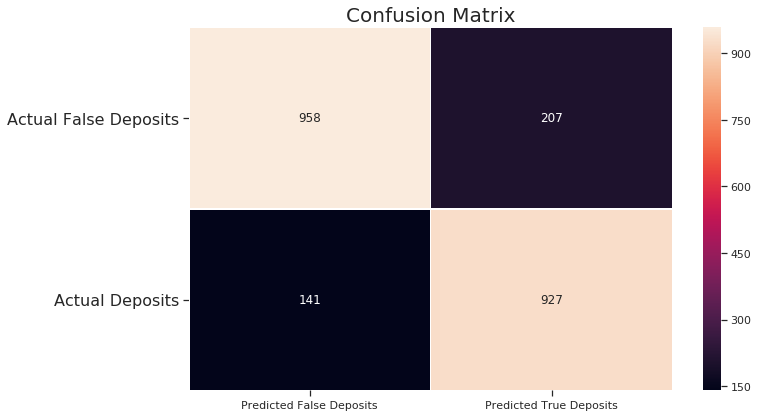

In [59]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(["Predicted False Deposits",'Predicted True Deposits'])
ax.set_yticklabels(['Actual False Deposits', 'Actual Deposits'], fontsize=16, rotation=360)
plt.show()


In [60]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score

# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('The model is {c} % sure that the potential client will subscribe to a term deposit'.format(c=np.round(precision_score(y_test, y_pred),2)*100))
print('The model is retaining {c} % of clients that agree to subscribe a term deposit'.format(c=np.round(recall_score(y_test, y_pred),2)*100))


The model is 82.0 % sure that the potential client will subscribe to a term deposit
The model is retaining 87.0 % of clients that agree to subscribe a term deposit


In [61]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)*100

84.19618528610354

<a id='precision_recall'></a>

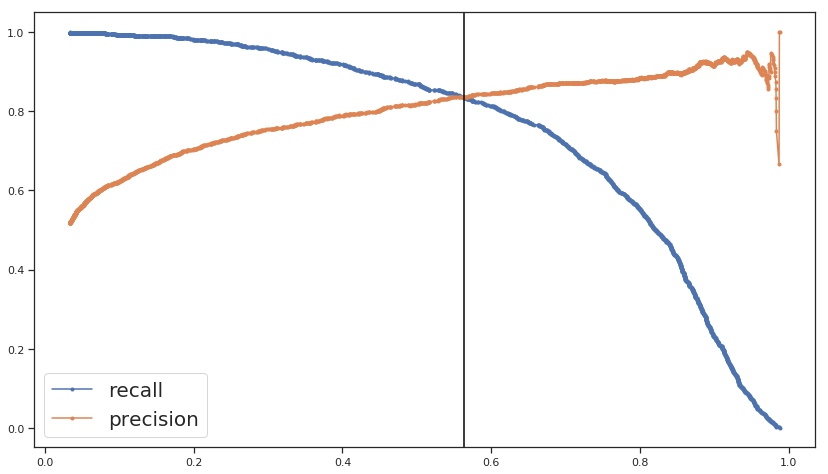

In [62]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(14,8))
y_prob=grad_clf.predict_proba(X_test)[:,1]
precisions, recalls, threshold = precision_recall_curve(y_test, y_prob)
plt.plot(threshold,recalls[:-1],marker='.',label='recall')
plt.plot(threshold,precisions[:-1],marker='.',label='precision')
plt.legend(frameon=True,fontsize=20)
plt.axvline(x=0.563,c='black')

plt.show()

## The Probablity threshold for Balanced value of Precision vs Recall is `0.563`

<a id='roc_auc'></a>

# ROC Curve (Receiver Operating Characteristic):
The **ROC curve** tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.


In [63]:
from sklearn.metrics import roc_curve
grd_fpr, grd_tpr, threshold = roc_curve(y_test, y_prob)


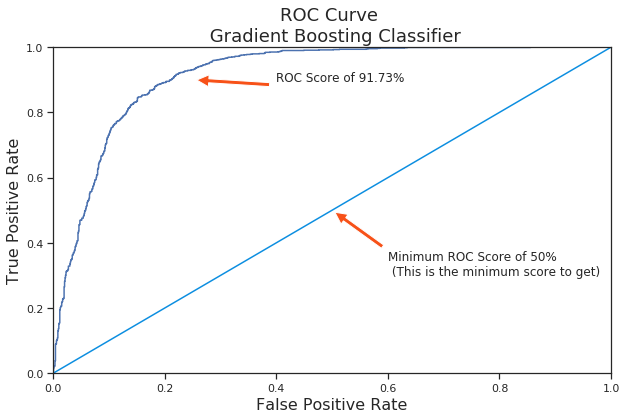

In [64]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n ', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_test, y_prob))


Gradient Boost Classifier Score:  0.9151339795213065


### Which Features Influence the Result of a Term Deposit Suscription?
### 
<a id="decision"></a>
The top three most important features for our classifier are **Duration (how long it took the conversation between the sales representative and the potential client), contact (number of contacts to the potential client within the same marketing campaign), month (the month of the year).




## GradientBoosting Classifier Wins!
Gradient Boosting classifier is the best model to predict whether or not a **potential client** will suscribe to a term deposit or not.  84% accuracy!

In [66]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)
y_pred=voting_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8042991491267353


<a id='parameter_optimization'></a>

### Parameter Optimization for Gradient Boosting Classifier

In [67]:
from sklearn.model_selection import GridSearchCV

param_test3 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1000,2000), 'min_samples_leaf':range(30,71,10),'n_estimators':range(20,81,10)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               max_features='sqrt', subsample=0.8, random_state=10),
                        param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 13,
  'min_samples_leaf': 30,
  'min_samples_split': 200,
  'n_estimators': 80},
 0.8560865693772263)

# What Actions should the Bank Consider?
<a id="bank_actions"></a>



## Suggestions and Conclusions for the Next Marketing Campaign:
1) **Term Deposit Prediction**: Our Model predicts with 84.6% Accuracy for new customers based on Data that whether he is going to opne a Term Deposit or Not. <br><br>
2) **Seasonality:** Potential clients opted to suscribe term deposits during the seasons of **fall** and **winter**. The next marketing campaign should focus its activity throghout these seasons. <br><br>
3) **Campaign Calls:** A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit. <br><br>
4) **Age Category:** The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions. <br><br>
5) **Occupation:** Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.<br><br>
6) **House Loans and Balances:** Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit. <br><br>

7) **Develop a Questionaire during the Calls:** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute. <br><br>

By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.




